# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame CALLED MERGED_DATA
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = merged_data['Mouse ID'].nunique()
print(number_of_mice)

249


In [6]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])

#collecting the duplicates
duplicate_mice = merged_data[duplicates]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_timepoints = duplicate_mice['Timepoint'].unique()

#showing the duplicate IDs and timepoints
print(duplicate_mouse_ids)
print(duplicate_timepoints)

['g989']
[ 0  5 10 15 20]


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicates = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
#filtering to show only duplicates and then estracting the Mouse IDs with duplicates. Its g989 as seen above
duplicate_mice = merged_data[duplicates]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
#filtering to show all data for duplicate mouseIDs
all_duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

#show the table
all_duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#identifying them and then making a dataframe that removes them
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
clean_df = merged_data[~merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

#looking to make sure they are gone
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count = clean_df['Mouse ID'].nunique()

#showing the count
unique_mice_count

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#start by grouping by drug reg
grouped_data = clean_df.groupby('Drug Regimen')

#Next calculating mean, med, var, stdev, SEM for tumor volume within new data grouped by drug regimen
mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
std_dev = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()

#putting this all into a new dataframe table
summary_df = pd.DataFrame({
    "Mean Tumor Volume": mean,
    "Median Tumor Volume": median,
    "Tumor Volume Variance": variance,
    "Tumor Volume Std. Dev.": std_dev,
    "Tumor Volume SEM": sem
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_summary = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

aggregated_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

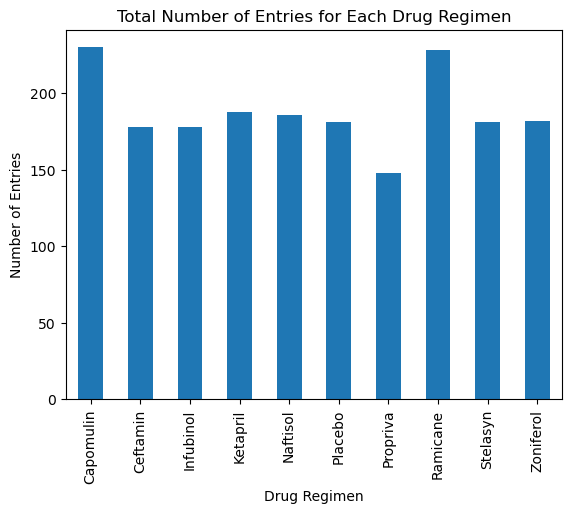

<Figure size 640x480 with 0 Axes>

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# grouping by regimen and counting how many are in each
regimen_count = clean_df.groupby('Drug Regimen').count()['Mouse ID']

# barplot - pandas method
regimen_count.plot(kind='bar', title='Total Number of Entries for Each Drug Regimen')

# Adding labels to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Entries')
plt.show()
plt.savefig("pandabar")

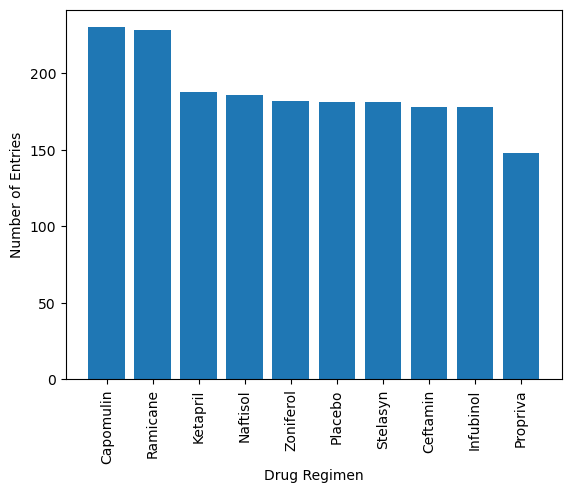

<Figure size 640x480 with 0 Axes>

In [53]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#didnt work, realized I forgot to import numpy so I do that first

import numpy as np

#using grouping from last table to make table using pyplot
regcount_pyplot = regimen_count.sort_values(ascending=False) 
plt.bar(regcount_pyplot.index, regcount_pyplot.values)
plt.xlabel ('Drug Regimen')
plt.ylabel ('Number of Entries')
plt.xticks(rotation='vertical')
plt.show()
plt.savefig("pyplotbar")

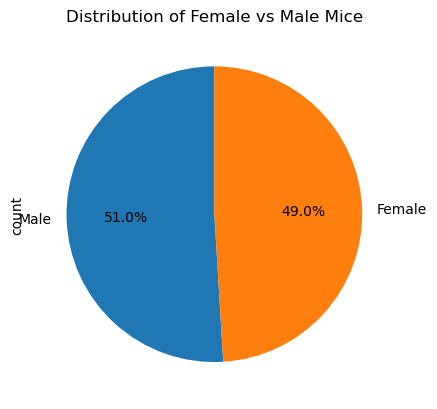

<Figure size 640x480 with 0 Axes>

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Counting males vs females and then creating the plot
gender_distribution = clean_df['Sex'].value_counts()
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, title='Distribution of Female vs Male Mice')

plt.show()
plt.savefig('pandapie')

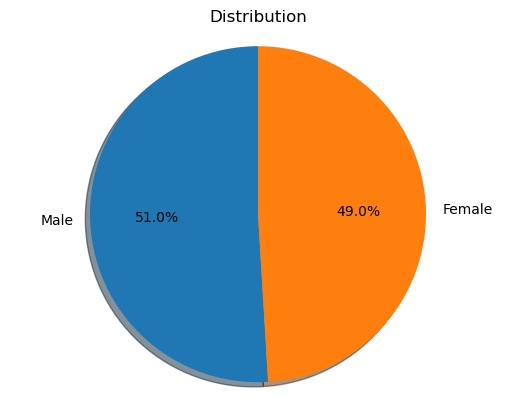

<Figure size 640x480 with 0 Axes>

In [48]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Distribution")
plt.pie(clean_df["Sex"].value_counts(), autopct="%1.1f%%", shadow=True, startangle=90, labels=["Male","Female"])
plt.axis("equal")
plt.show()
plt.savefig('pyplotpie')

## Quartiles, Outliers and Boxplots

In [42]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# begin by identifying the 4 regiment and then creating a place to store them in a new df
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = clean_df[clean_df['Drug Regimen'].isin(treatment_regimens)]

#max tumor volume from last time point measured
last_timepoint = filtered_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

#combining these with the new dfs with the first df to show final tumor vol
merged_df = pd.merge(last_timepoint, filtered_df, on=['Mouse ID', 'Timepoint'], how='left')

merged_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [43]:
# Put treatments into a list for for loop (and later for plot labels)
#already have "treatment_regimens" above but creating a new list for this step anyway
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    final_tumor_vol = merged_df.loc[merged_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']

    # Add subset 
    tumor_vol_data.append(final_tumor_vol)

    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    print(f"IQR for {treatment}: {iqr}")   
    
#now looking for outliers. determine bounds and then identify
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"Potential outliers for {treatment}: {outliers}")

IQR for Capomulin: 7.781863460000004
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Ramicane: 9.098536719999998
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR for Infubinol: 11.477135160000003
Potential outliers for Infubinol: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR for Ceftamin: 15.577752179999997
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


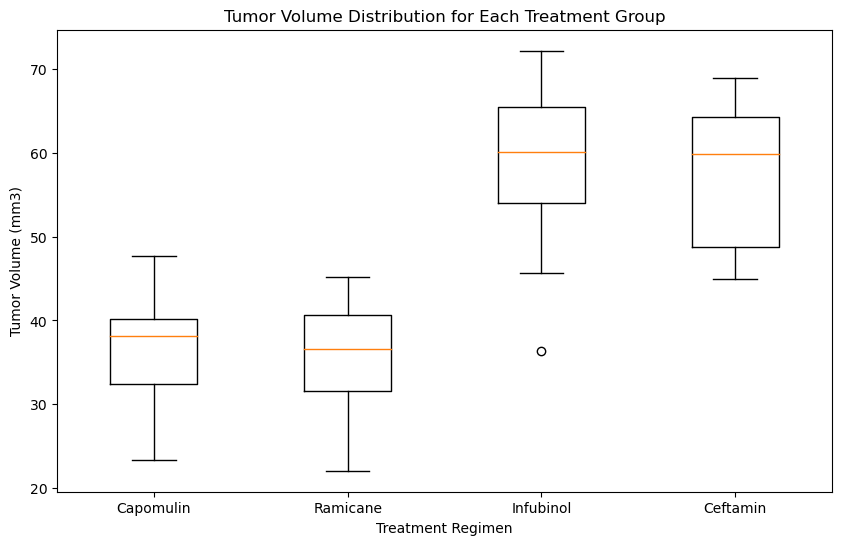

<Figure size 640x480 with 0 Axes>

In [51]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Tumor Volume Distribution for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Treatment Regimen')
plt.show()
plt.savefig('boxplot')

## Line and Scatter Plots

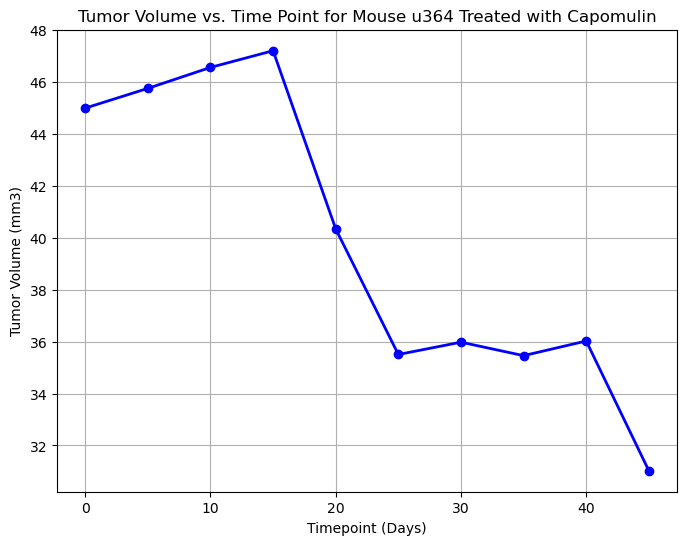

<Figure size 640x480 with 0 Axes>

In [57]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# start by identifying mise treated by Capomulin and then choosing one.Using 4 because I like the number 4
capomulin_mice = clean_df[clean_df['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
selected_mouse = capomulin_mice[4]  

#now collecting the data for mouse 4
mouse_data = clean_df[(clean_df['Mouse ID'] == selected_mouse) & (clean_df['Drug Regimen'] == 'Capomulin')]

#finally creating the line graph
plt.figure(figsize=(8, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-', linewidth=2)
plt.title(f'Tumor Volume vs. Time Point for Mouse {selected_mouse} Treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()
plt.savefig("lineplot_volvstime")

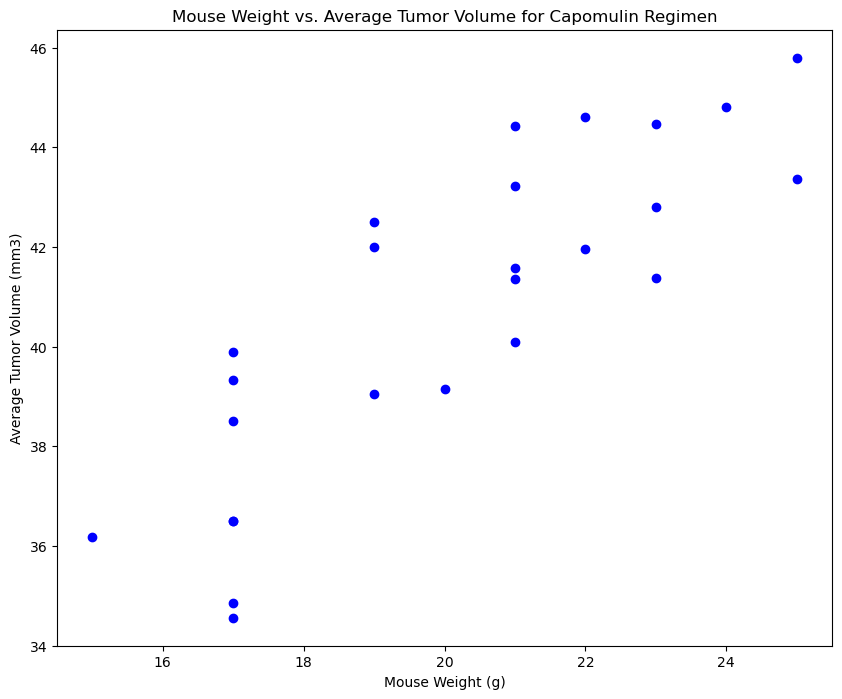

<Figure size 640x480 with 0 Axes>

In [56]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#dataframe for only capomulin treated mice
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

#this field will group capomulin treated mice by their ID and calculate avg tumor volums
average_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

#mouse_weight brings in mouse weight, then makes another dataframe table bringing it in
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()
merged_data = pd.DataFrame({'Average Tumor Volume': average_tumor_vol, 'Mouse Weight': mouse_weight})

#creating the scatterplot
plt.figure(figsize=(10, 8))
plt.scatter(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'], color='blue')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
plt.savefig("scatterplot")

## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume is 0.84


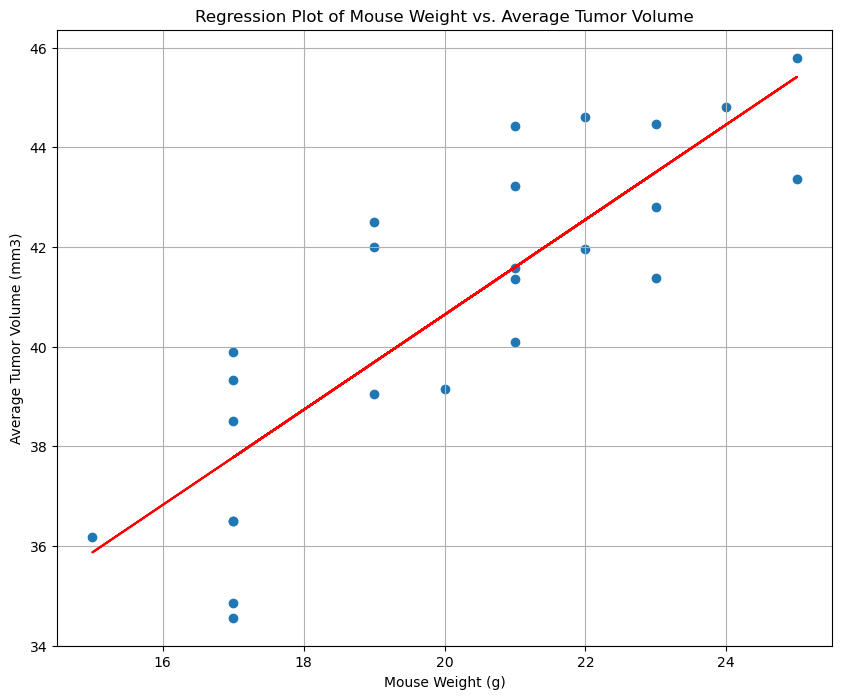

<Figure size 640x480 with 0 Axes>

In [55]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#calculating the corr. coefficient between weight and tumor volume. Fields from df where only capomulin mice used
correlation = st.pearsonr(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'])
print(f"The correlation coefficient between mouse weight and average tumor volume is {correlation[0]:.2f}")

# iinear regression between weight and tumor vol
#kept getting error, realized i had not imported linregress. doing here.
import scipy.stats as st
from scipy.stats import linregress

#now back to creating regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'])
regress_values = merged_data['Mouse Weight'] * slope + intercept

#puts regression line over scatterplot. Same plot as above but with new regression items
plt.figure(figsize=(10, 8))
plt.scatter(merged_data['Mouse Weight'], merged_data['Average Tumor Volume'])
plt.plot(merged_data['Mouse Weight'], regress_values, "r-")
plt.title('Regression Plot of Mouse Weight vs. Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()
plt.savefig("regressionplot")